In [2]:
import matplotlib.pyplot as plt
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.lhs import LatinHypercubeSampling
from pymoo.optimize import minimize as moo_minimize
from pymoo.factory import get_problem
from pymoode.nsde import NSDE
from pymoode.gde3 import GDE3
from pymoode.survivors import RankSurvival

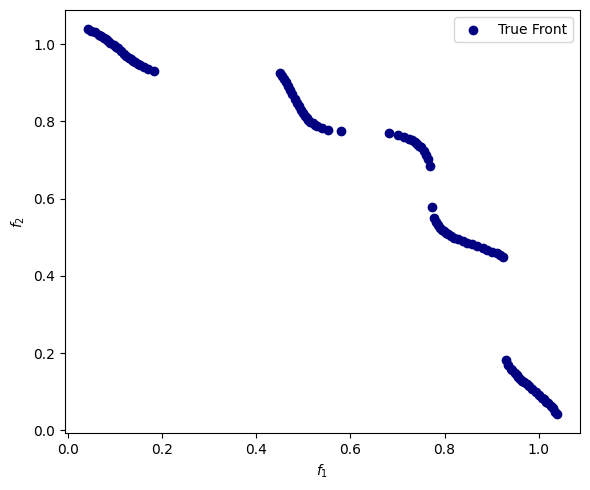

In [3]:
from pymoo.factory import get_problem

problem = get_problem("tnk")
pf = problem.pareto_front()

fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [4]:
problem.__dict__

{'n_var': 2,
 'n_obj': 2,
 'n_constr': 2,
 'data': {'type_var': numpy.float64},
 'xl': array([0.e+00, 1.e-30]),
 'xu': array([3.14159265, 3.14159265]),
 'callback': None,
 'check_inconsistencies': True,
 'replace_nan_values_by': inf,
 'exclude_from_serialization': [],
 '_pareto_set': <pymoo.util.cache.Cache at 0x1fcd92a2100>,
 '_pareto_front': <pymoo.util.cache.Cache at 0x1fcd92a23d0>,
 '_ideal_point': None,
 '_nadir_point': None}

In [5]:
lhs = LatinHypercubeSampling()

In [6]:
NGEN = 100
POPSIZE = 50
SEED = 5

In [7]:
gde3 = GDE3(pop_size=POPSIZE, CR=0.8, F=(0.0, 1.0), variant="DE/ranked/1/bin", SA=0.5, sampling=lhs,
            survival=RankSurvival(rule="full", crowding_func="cd"))

res_gde3 = moo_minimize(problem,
                        gde3,
                        ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  6.953353946 |  0.542703323 |  0.232312740 |  0.013916982
    2 |     100 |  0.00000E+00 |  2.480324593 |  0.273294814 |  0.176715260 |  0.076535147
    3 |     150 |  0.00000E+00 |  0.417719797 |  0.152798704 |  0.139751895 |  0.124814408
    4 |     200 |  0.00000E+00 |  0.052837035 |  0.109864906 |  0.093253310 |  0.171077240
    5 |     250 |  0.00000E+00 |  0.00000E+00 |  0.086009816 |  0.063575803 |  0.186680684
    6 |     300 |  0.00000E+00 |  0.00000E+00 |  0.056340548 |  0.038913824 |  0.225395490
    7 |     350 |  0.00000E+00 |  0.00000E+00 |  0.053746524 |  0.037475577 |  0.230016127
    8 |     400 |  0.00000E+00 |  0.00000E+00 |  0.045779295 |  0.038665821 |  0.237862248
    9 |     450 |  0.00000E+00 |  0.00000E+00 |  0.038686643 |  0.035958130 |  0.250881562
   10 |     500 |  0.00000E+00 |  0.00000E+00 |  0.036766459 |  0.033474556 |  0.256460688

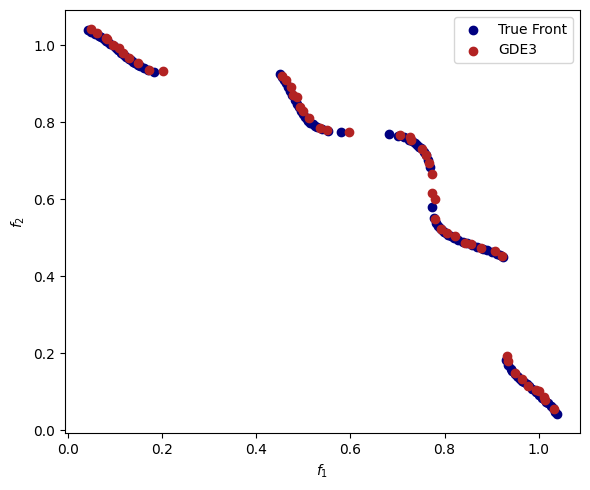

In [8]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [14]:
%%time
nsga2 = NSGA2(pop_size=POPSIZE, sampling=lhs, survival=RankSurvival(rule="full", crowding_func="cd"))

res_nsga2 = moo_minimize(problem,
                         nsga2,
                         ('n_gen', NGEN),
                         seed=SEED,
                         save_history=True,
                         verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  6.953353946 |  0.542703323 |  0.232312740 |  0.013916982
    2 |     100 |  0.00000E+00 |  1.066024142 |  0.325334084 |  0.187192948 |  0.050867530
    3 |     150 |  0.00000E+00 |  0.084604765 |  0.211503872 |  0.048149751 |  0.175101922
    4 |     200 |  0.00000E+00 |  0.00000E+00 |  0.209304626 |  0.066601777 |  0.176068820
    5 |     250 |  0.00000E+00 |  0.00000E+00 |  0.179139201 |  0.075520185 |  0.184178182
    6 |     300 |  0.00000E+00 |  0.00000E+00 |  0.170019142 |  0.059944380 |  0.185053819
    7 |     350 |  0.00000E+00 |  0.00000E+00 |  0.160471442 |  0.050880534 |  0.194824704
    8 |     400 |  0.00000E+00 |  0.00000E+00 |  0.105130420 |  0.047723667 |  0.196476684
    9 |     450 |  0.00000E+00 |  0.00000E+00 |  0.094918495 |  0.046218201 |  0.223801046
   10 |     500 |  0.00000E+00 |  0.00000E+00 |  0.086218972 |  0.038658566 |  0.232179869

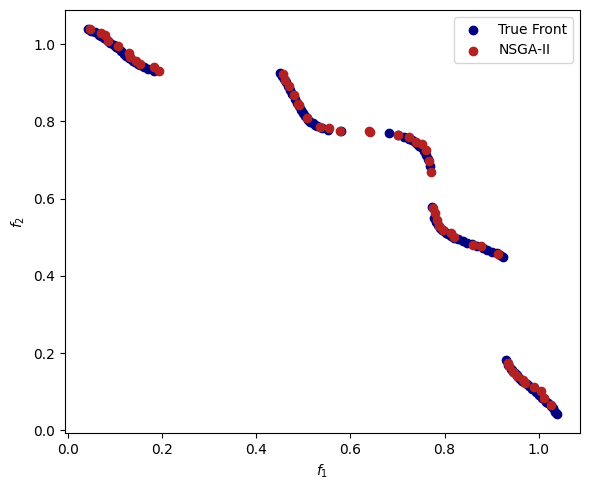

In [15]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsga2.F[:, 0], res_nsga2.F[:, 1], color="firebrick", label="NSGA-II")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [13]:
%%time
nsde = NSDE(pop_size=POPSIZE, CR=0.8, F=(0.0, 1.0), variant="DE/ranked/1/bin", SA=0.5, sampling=lhs,
            survival=RankSurvival(rule="full", crowding_func="mnn"))
    
res_nsde = moo_minimize(problem,
                        nsde,
                        ('n_gen', NGEN),
                        seed=SEED,
                        save_history=True,
                        verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |     igd      |      gd      |      hv     
    1 |      50 |  0.00000E+00 |  6.953353946 |  0.542703323 |  0.232312740 |  0.013916982
    2 |     100 |  0.00000E+00 |  0.827376486 |  0.273294814 |  0.176715260 |  0.076535147
    3 |     150 |  0.00000E+00 |  0.126608484 |  0.152982973 |  0.117171097 |  0.128817151
    4 |     200 |  0.00000E+00 |  0.014439288 |  0.139626684 |  0.111721589 |  0.144986929
    5 |     250 |  0.00000E+00 |  0.00000E+00 |  0.094913429 |  0.086547177 |  0.183633608
    6 |     300 |  0.00000E+00 |  0.00000E+00 |  0.080774626 |  0.066382400 |  0.202278985
    7 |     350 |  0.00000E+00 |  0.00000E+00 |  0.075413073 |  0.070436383 |  0.218356721
    8 |     400 |  0.00000E+00 |  0.00000E+00 |  0.057815112 |  0.033110973 |  0.245403817
    9 |     450 |  0.00000E+00 |  0.00000E+00 |  0.056376801 |  0.032863475 |  0.248092030
   10 |     500 |  0.00000E+00 |  0.00000E+00 |  0.052146663 |  0.029009252 |  0.266072141

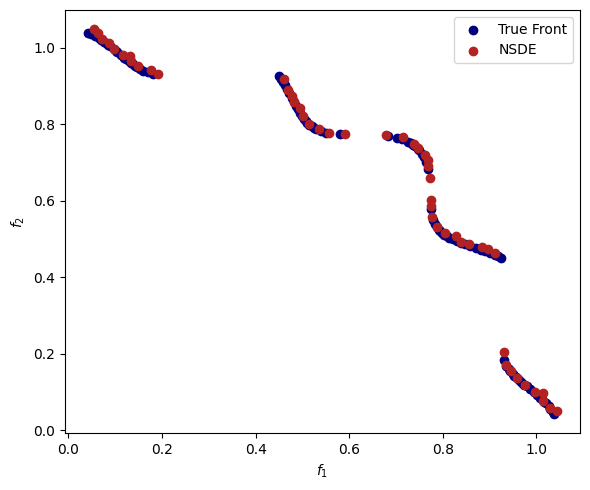

In [16]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=100)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_nsde.F[:, 0], res_nsde.F[:, 1], color="firebrick", label="NSDE")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()